# Machine Learning Project To Predict 📈🧐💻🖥️

## Upload data set

In [24]:
import pandas as pd 
# import matplotlib.pyplot as plt 
df = pd.read_csv('laptop_data_cleaned.csv')
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [25]:
df['Os'].value_counts()


Os
Windows    1100
Others      152
Mac          21
Name: count, dtype: int64

In [26]:
df=df.sort_values(by='TypeName').reset_index(drop=True)
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Acer,2 in 1 Convertible,4,1.25,9.913097,1,1,135.094211,Other Intel Processor,0,0,Intel,Others
1,Mediacom,2 in 1 Convertible,4,1.16,9.676005,1,1,189.905791,Other Intel Processor,0,32,Intel,Windows
2,Dell,2 in 1 Convertible,8,1.68,10.765658,1,0,165.632118,Intel Core i5,0,256,Intel,Windows
3,Dell,2 in 1 Convertible,16,2.77,11.470547,1,0,127.335675,Intel Core i7,0,512,Nvidia,Windows
4,Lenovo,2 in 1 Convertible,16,2.80,11.775314,1,1,209.800683,Intel Core i7,0,512,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,HP,Workstation,16,2.60,11.766671,0,0,141.211998,Intel Core i7,0,256,Nvidia,Windows
1269,HP,Workstation,8,3.00,11.947682,0,1,127.335675,Intel Core i7,1000,0,AMD,Windows
1270,Lenovo,Workstation,16,2.18,11.501201,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
1271,Dell,Workstation,8,2.23,11.572957,0,0,141.211998,Other Intel Processor,1000,0,Nvidia,Windows


## Data Cleanning and Preprocessing

### Understand Data

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1263 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1268 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ram,1273.0,8.447761,5.098771,2.000000,4.000000,8.000000,8.000000,64.000000
Weight,1263.0,2.041449,0.670459,0.690000,1.500000,2.040000,2.310000,4.700000
Price,1273.0,10.828218,0.619565,9.134616,10.387379,10.872255,11.287447,12.691441
TouchScreen,1273.0,0.146897,0.354142,0.000000,0.000000,0.000000,0.000000,1.000000
Ips,1273.0,0.279654,0.449006,0.000000,0.000000,0.000000,1.000000,1.000000
Ppi,1268.0,147.016528,42.987064,90.583402,127.335675,141.211998,157.350512,352.465147
HDD,1273.0,413.715632,518.054486,0.000000,0.000000,0.000000,1000.000000,2000.000000
SSD,1273.0,186.252946,186.531571,0.000000,0.000000,256.000000,256.000000,1024.000000


In [29]:
df.isnull().sum()

Company         0
TypeName        0
Ram             0
Weight         10
Price           0
TouchScreen     0
Ips             0
Ppi             5
Cpu_brand       0
HDD             0
SSD             0
Gpu_brand       0
Os              0
dtype: int64

### Fill NULL Values

In [30]:
# Fill pPi With mean value
from sklearn.impute import SimpleImputer
Impute=SimpleImputer(strategy='mean')
df['Ppi']=Impute.fit_transform(df[['Ppi']])
df['Ppi']=df['Ppi'].round(2)

In [31]:
# Fill Weight With KnnImputer beacaue data is sorted by Type
from sklearn.impute import KNNImputer
Impute = KNNImputer(n_neighbors=3)
df['Weight']=Impute.fit_transform(df[['Weight']])
df['Weight']=df['Weight'].round(2)

In [32]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [33]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

## Visualization

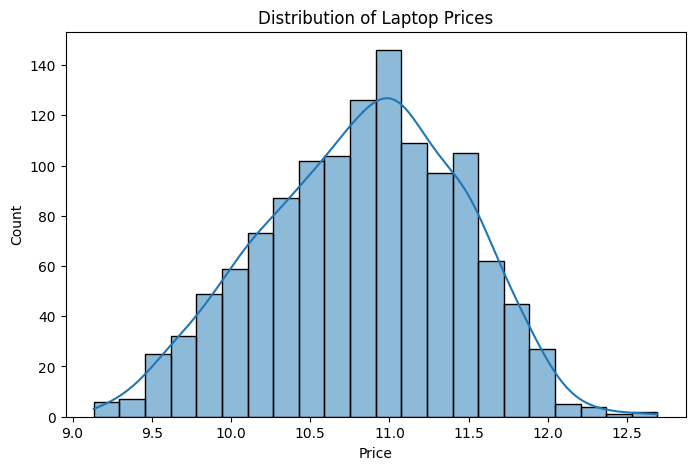

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()



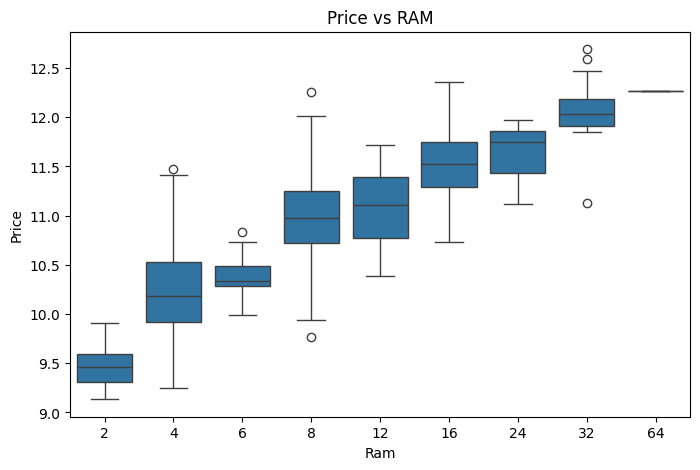

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Ram', y='Price', data=df)
plt.title("Price vs RAM")
plt.show()


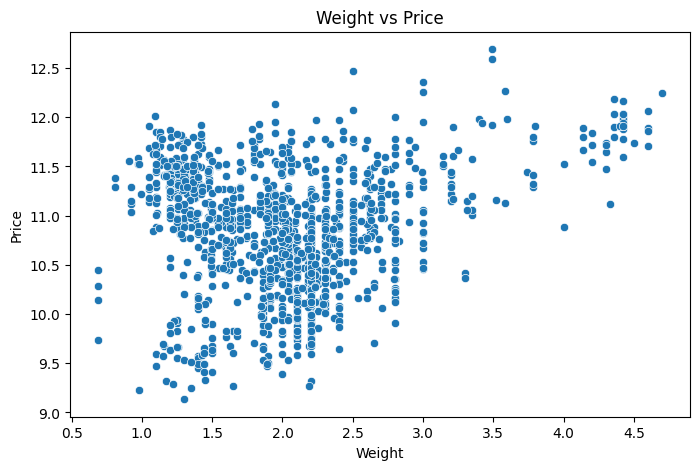

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Weight', y='Price', data=df)
plt.title("Weight vs Price")
plt.show()


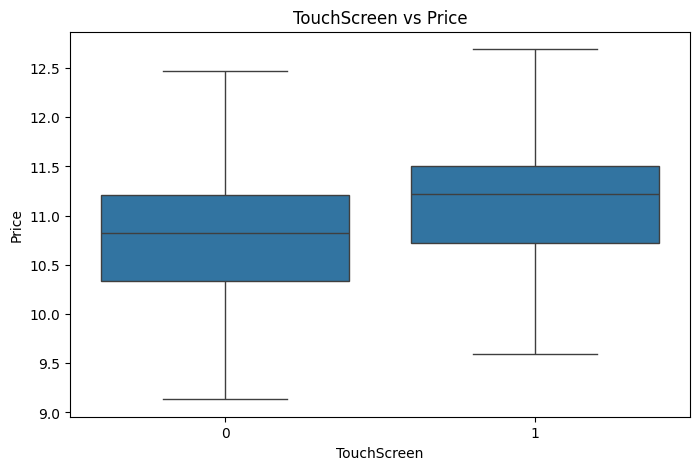

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='TouchScreen', y='Price', data=df)
plt.title("TouchScreen vs Price")
plt.show()


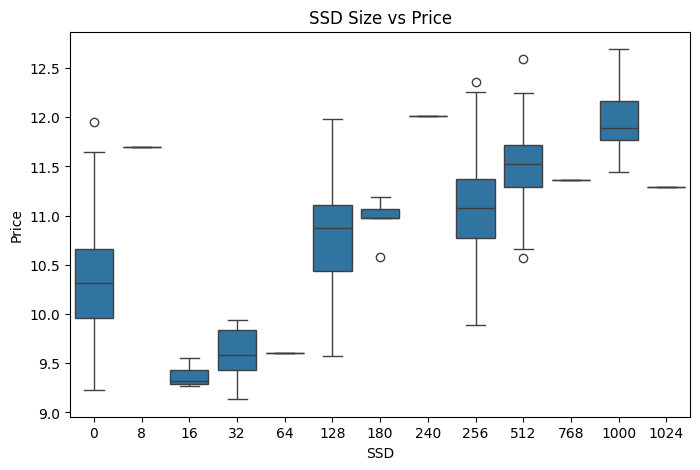

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='SSD', y='Price', data=df)
plt.title("SSD Size vs Price")
plt.show()


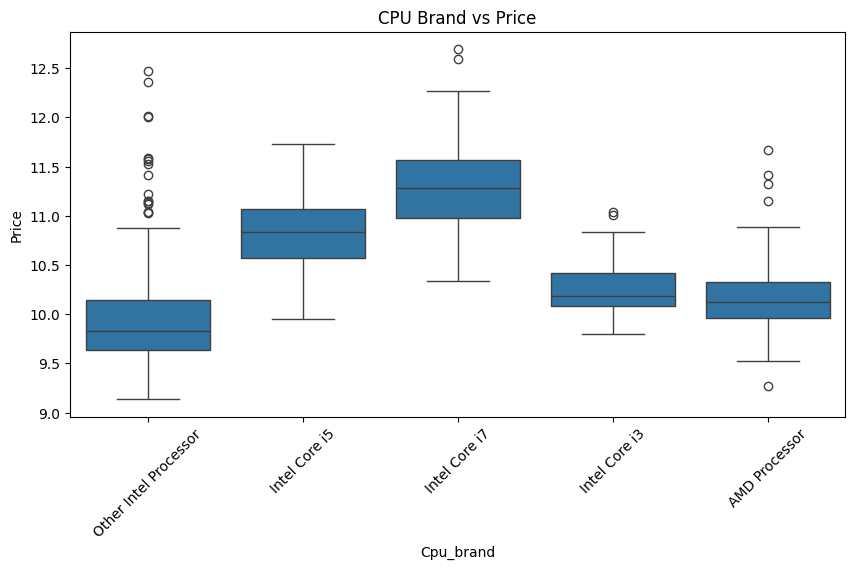

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Cpu_brand', y='Price', data=df)
plt.title("CPU Brand vs Price")
plt.xticks(rotation=45)
plt.show()


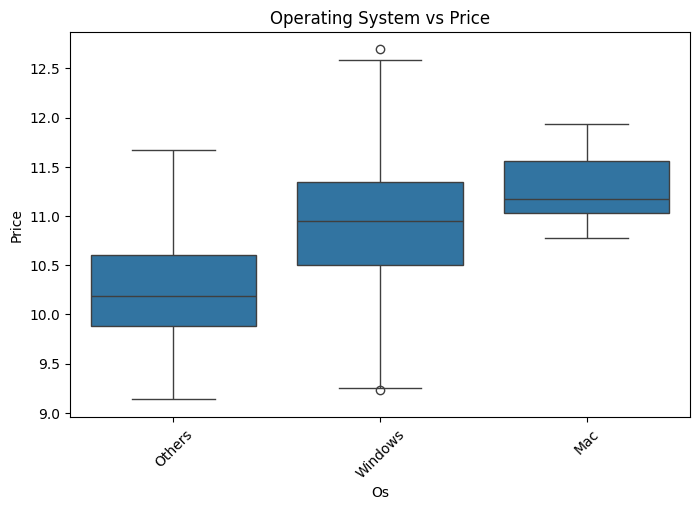

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Os', y='Price', data=df)
plt.title("Operating System vs Price")
plt.xticks(rotation=45)
plt.show()


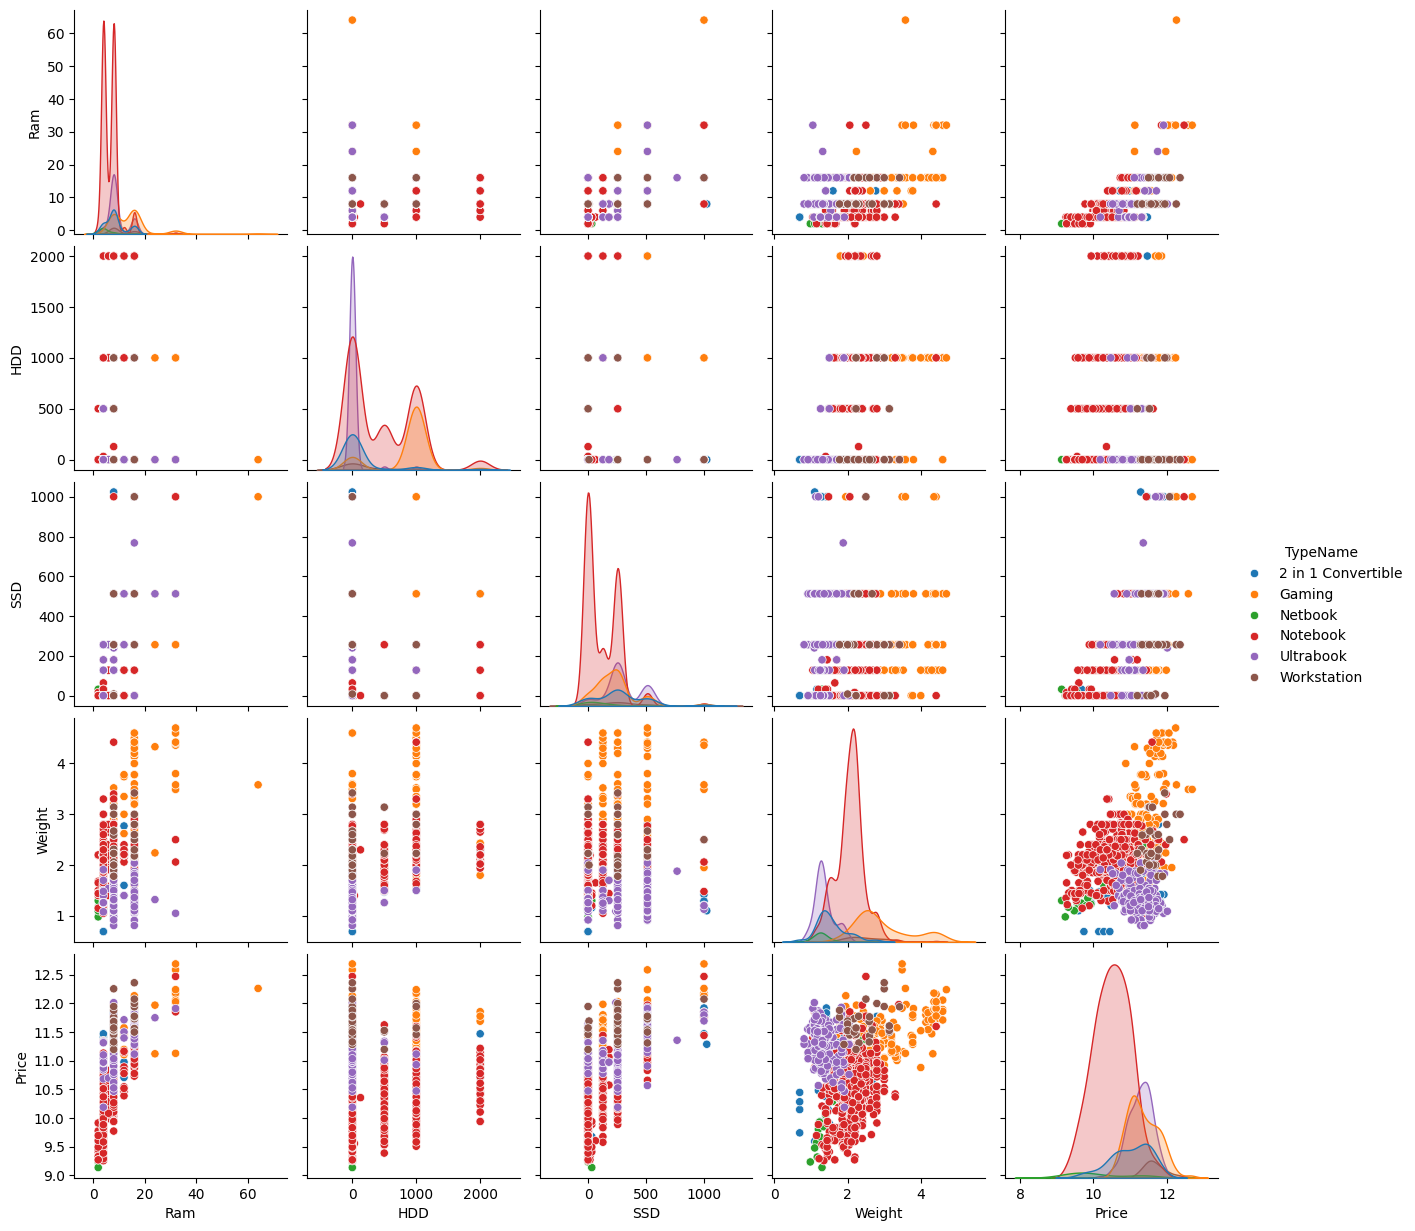

In [41]:
sns.pairplot(df,
             vars=['Ram', 'HDD', 'SSD', 'Weight',
                   'Price'],
            hue='TypeName')
plt.show()

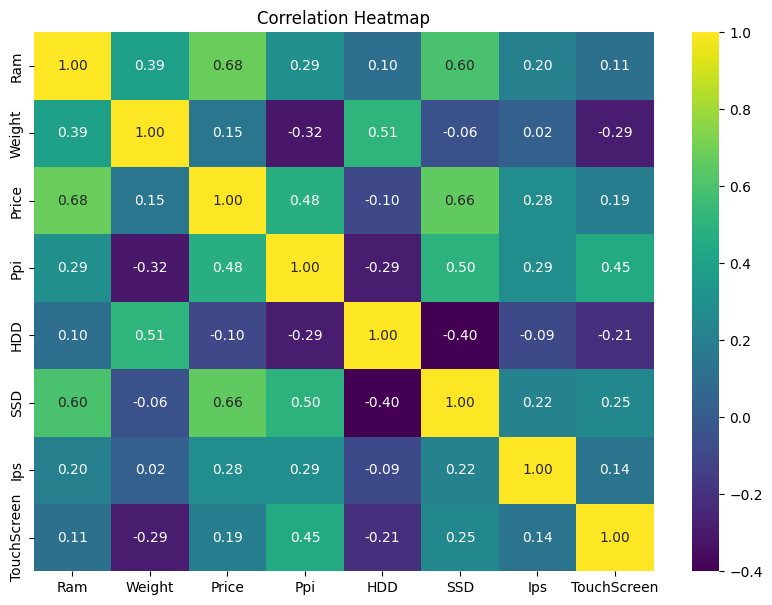

In [42]:
numeric_df = df[['Ram', 'Weight', 'Price', 'Ppi', 'HDD', 'SSD','Ips','TouchScreen']]

# نحسب معامل الارتباط
corr = numeric_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Preprocessing Data to Bulid Models

### Encoding

In [43]:
# Encode 
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Company']=encode.fit_transform(df['Company'])
df['TypeName']=encode.fit_transform(df['TypeName'])
df['Cpu_brand']=encode.fit_transform(df['Cpu_brand'])
df['Gpu_brand']=encode.fit_transform(df['Gpu_brand'])
df['Os']=encode.fit_transform(df['Os'])

In [44]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,0,0,4,1.25,9.913097,1,1,135.09,4,0,0,1,1
1,12,0,4,1.16,9.676005,1,1,189.91,4,0,32,1,2
2,4,0,8,1.68,10.765658,1,0,165.63,2,0,256,1,2
3,4,0,16,2.77,11.470547,1,0,127.34,3,0,512,2,2
4,10,0,16,2.80,11.775314,1,1,209.80,3,0,512,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,7,5,16,2.60,11.766671,0,0,141.21,3,0,256,2,2
1269,7,5,8,3.00,11.947682,0,1,127.34,3,1000,0,0,2
1270,10,5,16,2.18,11.501201,0,0,141.21,3,0,512,2,2
1271,4,5,8,2.23,11.572957,0,0,141.21,4,1000,0,2,2


### Check Outliers

In [45]:
from scipy.stats import zscore
for col in df.columns:
    column=zscore(df[col])
    outliers=df[col][abs(column)>3]
    print(col)
    print(outliers)
    print('Count Of Outliers => ',len(outliers))
    print('-'*15)

Company
Series([], Name: Company, dtype: int64)
Count Of Outliers =>  0
---------------
TypeName
Series([], Name: TypeName, dtype: int64)
Count Of Outliers =>  0
---------------
Ram
140     32
147     32
174     24
176     32
193     32
196     32
199     24
204     32
224     32
251     32
252     32
273     32
290     32
295     32
299     32
301     32
306     64
919     32
990     32
1115    24
1168    32
Name: Ram, dtype: int64
Count Of Outliers =>  21
---------------
Weight
116     4.36
120     4.30
140     4.42
143     4.60
153     4.14
157     4.30
160     4.42
170     4.42
176     4.42
184     4.14
190     4.50
192     4.14
193     4.60
199     4.33
204     4.42
205     4.30
212     4.20
220     4.42
224     4.36
226     4.20
232     4.20
235     4.42
248     4.36
251     4.60
272     4.36
273     4.40
275     4.30
284     4.60
290     4.42
295     4.42
296     4.42
301     4.70
1021    4.42
Name: Weight, dtype: float64
Count Of Outliers =>  33
---------------
Price
252    12.

## Regrission Model with Nural network

In [46]:
# before make Pca You should make Scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x= df.drop('Price',axis=1)
y=df['Price'] # serice
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
pca=PCA(n_components=.95)
x_train_pca =pd.DataFrame( pca.fit_transform(x_train_scaled))
x_test_pca = pd.DataFrame(pca.transform(x_test_scaled))


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Build Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_pca.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # لأن الهدف عندك هو "Price" = output واحد
])

# Collect Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# training Model
history = model.fit(x_train_pca, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 4. تقييم النموذج على test set
y_pred = model.predict(x_test_pca)

Epoch 1/100


c:\Users\ASUS\Documents\programing\python3\macine Learning\Nural\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 110.4408 - mae: 10.4767 - val_loss: 83.2408 - val_mae: 9.0923
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 73.6784 - mae: 8.5189 - val_loss: 44.2578 - val_mae: 6.4967
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.6116 - mae: 5.6825 - val_loss: 14.7680 - val_mae: 3.4215
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.8221 - mae: 2.9568 - val_loss: 5.2911 - val_mae: 1.9069
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2838 - mae: 1.8494 - val_loss: 3.2178 - val_mae: 1.4816
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3419 - mae: 1.4683 - val_loss: 2.5783 - val_mae: 1.3322
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5590 - mae: 1.2965 - val_loss: 2.2787 - val_mae: 1.2428
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4938 - mae: 1.2721 - val_loss: 2.0716 - val_mae: 1.1818
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0815 

In [48]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

loss, mae = model.evaluate(x_test_pca, y_test, verbose=0)

print(f"Test Loss (MSE): {loss:.2f}")
print(f"Test MAE: {mae:.2f}")

mean squared error: 0.12
R² Score: 0.68
Test Loss (MSE): 0.12
Test MAE: 0.26


## Classification Model with Nural network


In [49]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [50]:
df['TouchScreen'].value_counts()

TouchScreen
0    1086
1     187
Name: count, dtype: int64

In [51]:
x= df.drop('TouchScreen',axis=1)
y=df['TouchScreen'] # serice
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)
scaler = StandardScaler()
x_train_scaled1 = scaler.fit_transform(x_train)
x_test_scaled1 = scaler.transform(x_test)
pca=PCA(n_components=.95)
x_train_pca1 =pd.DataFrame( pca.fit_transform(x_train_scaled1))
x_test_pca1 = pd.DataFrame(pca.transform(x_test_scaled1))

In [52]:
# build Model
from keras.models import Sequential
from keras.layers import Dense
model=Sequential([
    # Dense(64, activation='relu', input_shape=(x_train_pca.shape[1],)),
    
    Dense(32,activation='relu',input_shape=(x_train_pca1.shape[1],)),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])
# collect model
from keras.optimizers import Adam
model.compile(
    optimizer = Adam(learning_rate = .001),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)
#Train Model
his= model.fit(
    x_train_pca1,y_train,
    validation_data=(x_test_pca1,y_test),
    epochs=50,
    batch_size=32,
    verbose=1,
)

Epoch 1/50


c:\Users\ASUS\Documents\programing\python3\macine Learning\Nural\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3632 - loss: 0.7731 - val_accuracy: 0.7922 - val_loss: 0.5880
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8596 - loss: 0.5423 - val_accuracy: 0.8588 - val_loss: 0.4430
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8860 - loss: 0.3951 - val_accuracy: 0.8902 - val_loss: 0.3420
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9070 - loss: 0.3021 - val_accuracy: 0.9176 - val_loss: 0.2811
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9232 - loss: 0.2506 - val_accuracy: 0.9294 - val_loss: 0.2429
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9305 - loss: 0.2201 - val_accuracy: 0.9255 - val_loss: 0.2255
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9468 - loss: 0.1973 - val_accuracy: 0.9294 - val_loss: 0.2152
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9273 - loss: 0.2113 - val_accuracy: 0.9333 - val_loss: 0.2079
Epo

In [53]:
loss , accuricy = model.evaluate(x_test_pca1,y_test,verbose=0)
print(f"Accuricy => {accuricy:2f}")

Accuricy => 0.949020


## Unsupervised Model with K mean

In [54]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [55]:
unSupervised_df = df[['Ram', 'Weight', 'HDD', 'SSD', 'TouchScreen']]
unSupervised_df

,Ram,Weight,HDD,SSD,TouchScreen
0,4,1.25,0,0,1
1,4,1.16,0,32,1
2,8,1.68,0,256,1
3,16,2.77,0,512,1
4,16,2.80,0,512,1
...,...,...,...,...,...
1268,16,2.60,0,256,0
1269,8,3.00,1000,0,0
1270,16,2.18,0,512,0
1271,8,2.23,1000,0,0


In [56]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=5,random_state=0).fit(unSupervised_df)
evaluation=pd.DataFrame(Kmeans.labels_)
unSupervised_df['Evaluation'] = evaluation
unSupervised_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24192\2215763954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unSupervised_df['Evaluation'] = evaluation


,Ram,Weight,HDD,SSD,TouchScreen,Evaluation
0,4,1.25,0,0,1,0
1,4,1.16,0,32,1,0
2,8,1.68,0,256,1,0
3,16,2.77,0,512,1,3
4,16,2.80,0,512,1,3
...,...,...,...,...,...,...
1268,16,2.60,0,256,0,0
1269,8,3.00,1000,0,0,1
1270,16,2.18,0,512,0,3
1271,8,2.23,1000,0,0,1
